In [21]:
import pandas as pd
import seaborn as sns

In [4]:
file_data = pd.read_csv('/content/train.csv')

In [5]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
file_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print(file_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
file_data["Age"] = file_data["Age"].fillna(file_data["Age"].median())
file_data["Embarked"] = file_data["Embarked"].fillna(file_data["Embarked"].mode()[0])
file_data["Cabin"] = file_data["Cabin"].fillna(file_data["Cabin"].mode()[0])

In [12]:
print(file_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [13]:
file_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [14]:
file_data = file_data.drop(["Name", "Ticket", "Cabin", "PassengerId" , "Fare"], axis=1)

In [16]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [18]:
file_data["Sex"] = file_data["Sex"].map({"male": 0, "female": 1})

In [19]:
print(file_data['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

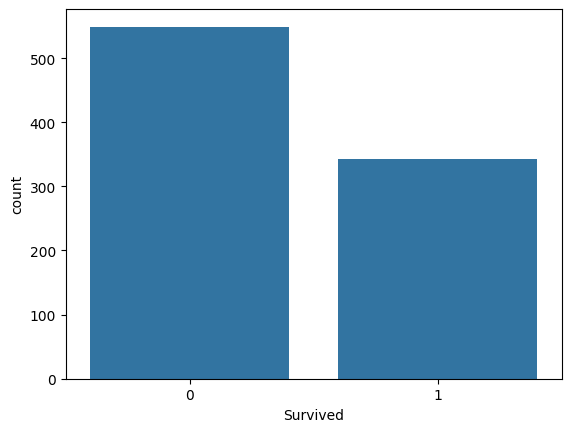

In [22]:
sns.countplot(x='Survived', data=file_data)

<Axes: xlabel='Survived', ylabel='count'>

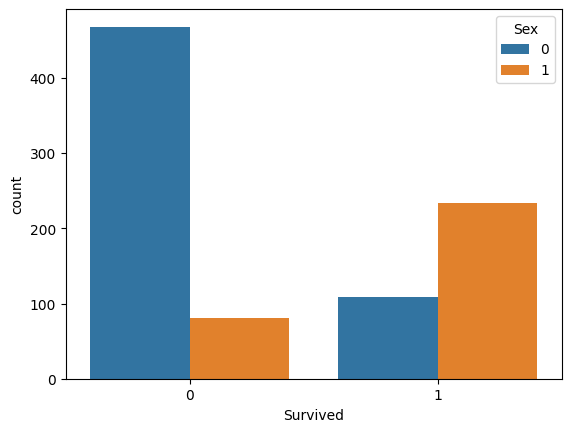

In [23]:
sns.countplot(x='Survived', hue='Sex', data=file_data)

More females survived than males.

<Axes: >

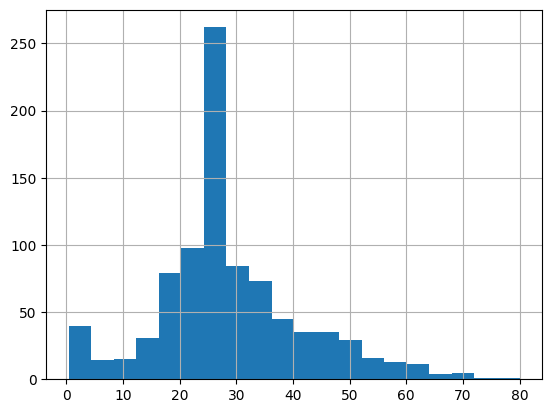

In [24]:
file_data['Age'].hist(bins=20)

Most passengers are aged 20–40.

<Axes: xlabel='Survived', ylabel='count'>

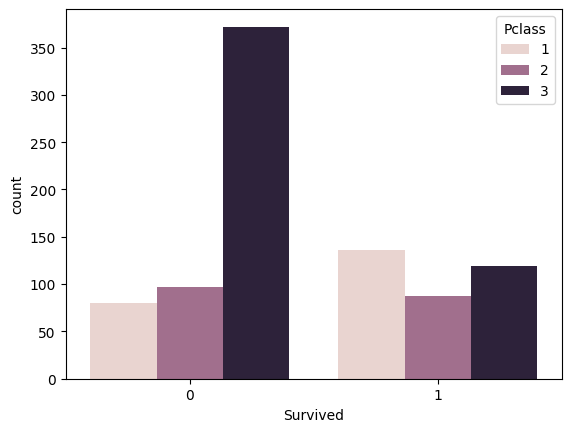

In [25]:
sns.countplot(x='Survived', hue='Pclass', data=file_data)

Passengers in 1st class had higher survival.